<a href="https://colab.research.google.com/github/arindamdeyofficial/vertebraeSurgeryRiskFactor/blob/main/Group307_kyphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Import Libraries/Dataset

b.	Import the required libraries

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/arindamdeyofficial/vertebraeSurgeryRiskFactor/7e5ba322ac93a5636528e286894521d35f7d4995/kyphosis.csv')

2.	Data Visualization and Exploration



a.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

2.	Data Visualization and Exploration


b.	Print the description and shape of the dataset.

In [7]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [8]:
df.shape

(81, 4)

2.	Data Visualization and Exploration


c.	Provide appropriate visualization to get an insight about the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

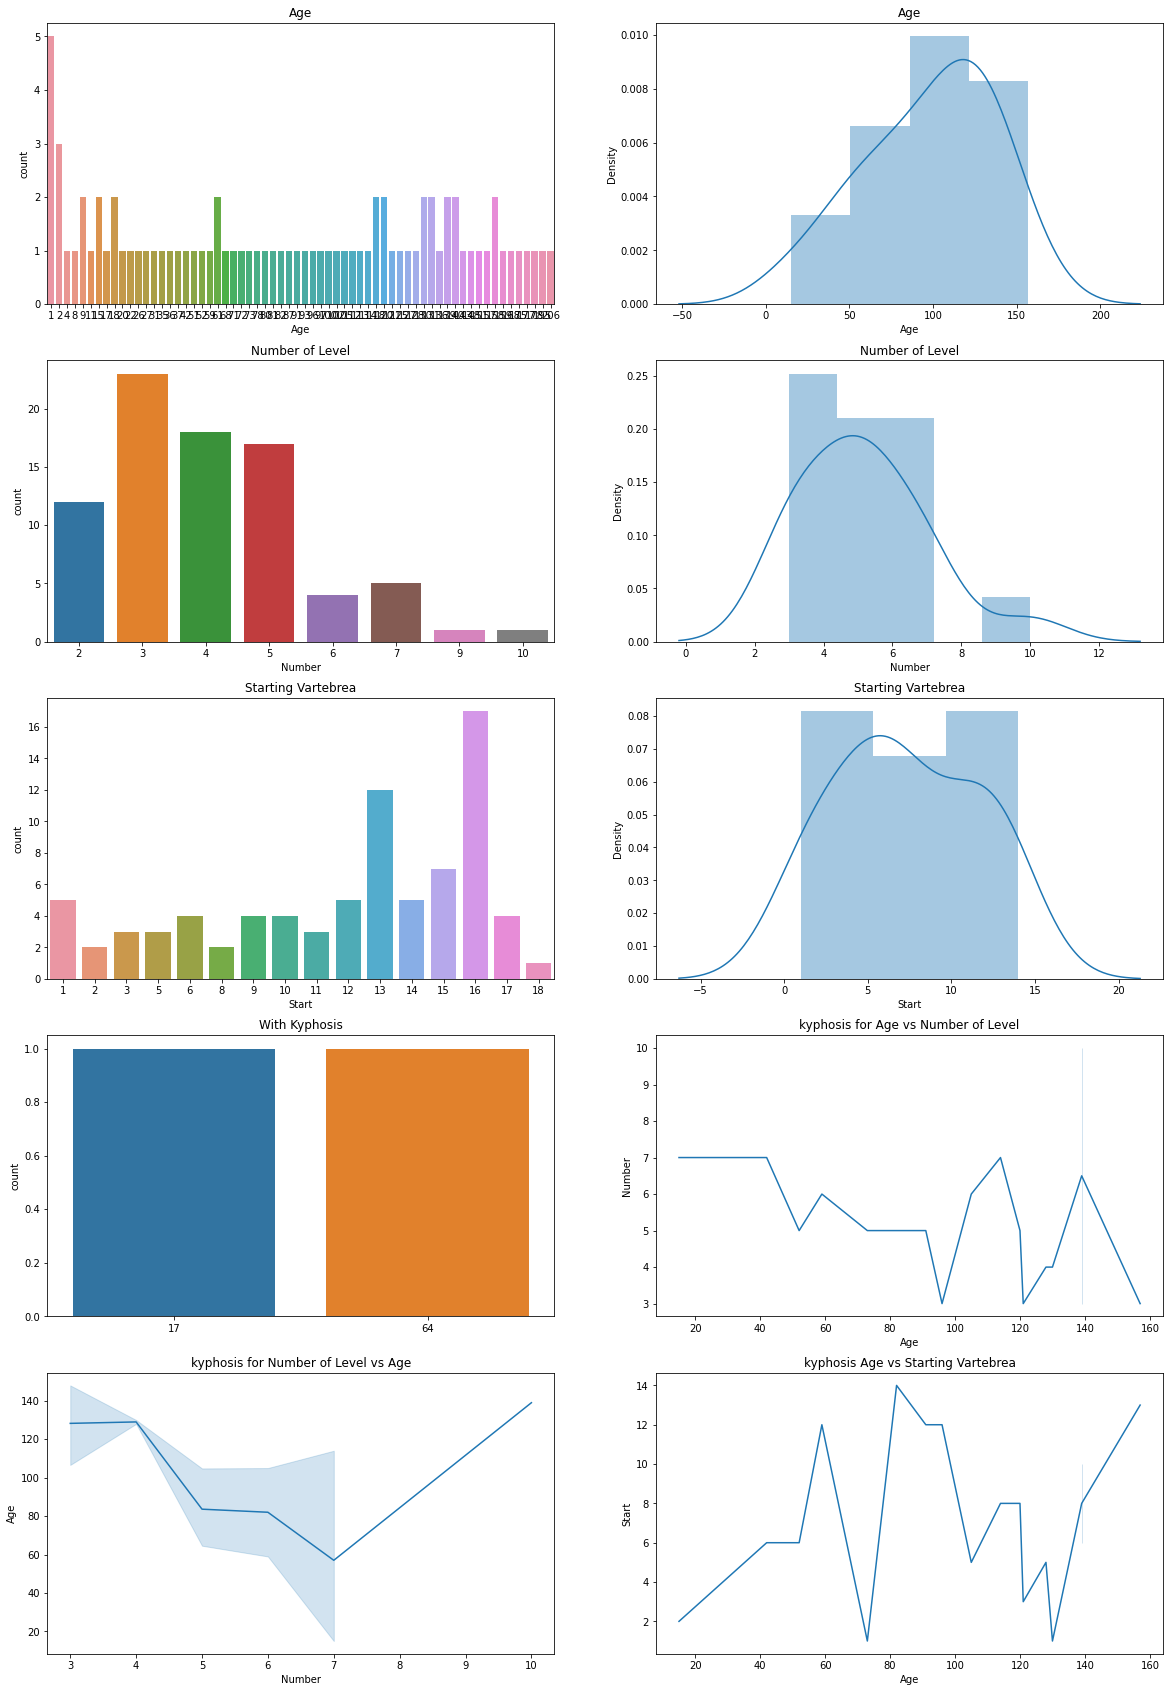

In [79]:
#Number === number of levels involved
#Start === starting vertebrae level of the surgery

n_rows=5
n_cols=2
width=20
height=30

fig,ax=plt.subplots(n_rows,n_cols,sharex=False,sharey=False,figsize=(width,height))
#Data normalisation view
wk = df[df["Kyphosis"]=="present"]

#Age
g = sns.countplot(df["Age"], ax=ax[0,0])
ax[0,0].set_title("Age")

g = sns.distplot(wk["Age"], ax=ax[0,1])
ax[0,1].set_title("Age")

#Number
g = sns.countplot(df["Number"], ax=ax[1,0])
ax[1,0].set_title("Number of Level")

g = sns.distplot(wk["Number"], ax=ax[1,1])
ax[1,1].set_title("Number of Level")

#Start
g = sns.countplot(df["Start"], ax=ax[2,0])
ax[2,0].set_title("Starting Vartebrea")

g = sns.distplot(wk["Start"], ax=ax[2,1])
ax[2,1].set_title("Starting Vartebrea")

#count kyphosis
l = len(df[df["Kyphosis"]=="present"])
g = sns.countplot([l,len(df)-l], ax=ax[3,0])
ax[3,0].set_title("With Kyphosis")

#Count kyphosis for Age vs Number of Level
#Having kyphosis Age vs Number Lineplot Age in X axis
wk = df[df["Kyphosis"]=="present"]
g = sns.lineplot(data=wk, x="Age", y="Number", ax=ax[3,1])
ax[3,1].set_title("kyphosis for Age vs Number of Level")

#Having kyphosis Number vs Age Countplot Number in X axis
g = sns.lineplot(data=wk, x="Number", y="Age", ax=ax[4,0])
ax[4,0].set_title("kyphosis for Number of Level vs Age")

#Having kyphosis Age vs Starting Vartebrea
g = sns.lineplot(data=wk, x="Age", y="Start",  ax=ax[4,1])
ax[4,1].set_title("kyphosis Age vs Starting Vartebrea")

plt.show()

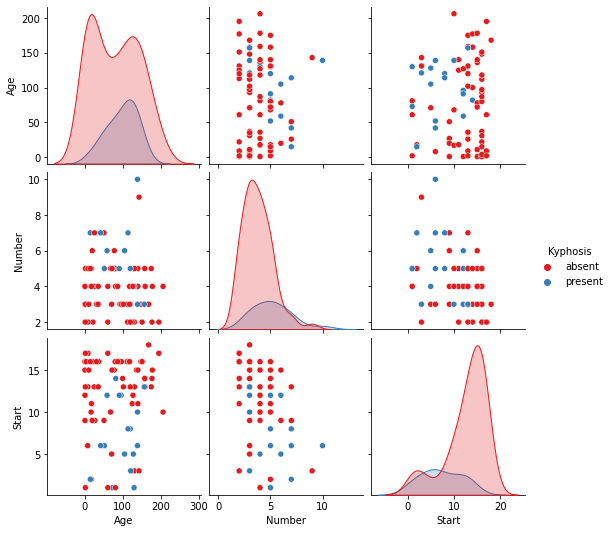

In [80]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

d.	Try exploring the data and see what insights can be drawn from the dataset.


Exploratory data analysis

Conclusion from Dataset visualisation:

3.	Data Pre-processing and cleaning

a.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.

Now First check should be any Null is present or not

In [81]:
df.isna().any()

Kyphosis    False
Age         False
Number      False
Start       False
dtype: bool

In [13]:
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

Now there are no Null values present


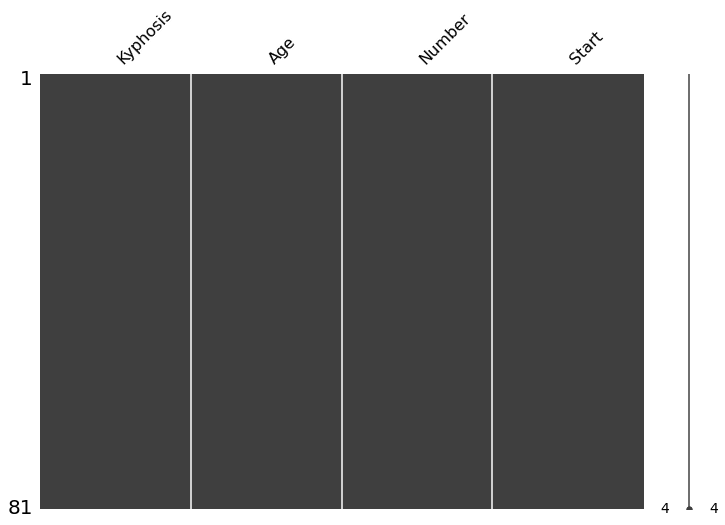

In [14]:
!pip install missingno
import missingno
missingno.matrix(df,figsize=(12,8))

Outlier Identificayion and removal

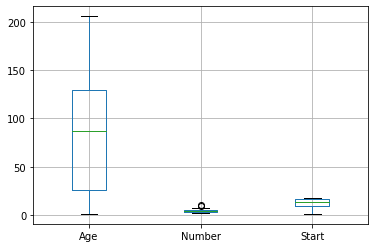

In [82]:
df.boxplot()

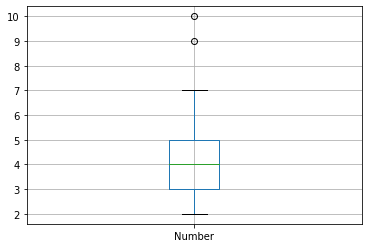

In [83]:
df.boxplot(column=['Number'])

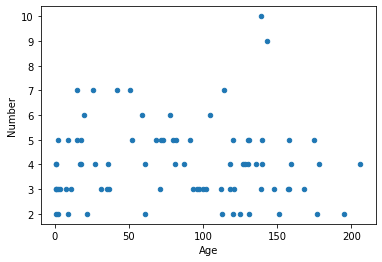

In [84]:
df.plot.scatter('Age', 'Number')

In [85]:
df[df["Number"]>=9]

,Kyphosis,Age,Number,Start
42,absent,143,9,3
52,present,139,10,6


This 2 are really unrealistic data according to age also and as per scatter plot. So can discard

In [86]:
index_names = df.loc[df["Number"]>=9].index
index_names

Int64Index([42, 52], dtype='int64')

Now we will not drop the record rather will do outlier treatment

In [31]:
#df.drop(index_names, inplace = True)


In [41]:
df.iloc[index_names]

,Kyphosis,Age,Number,Start


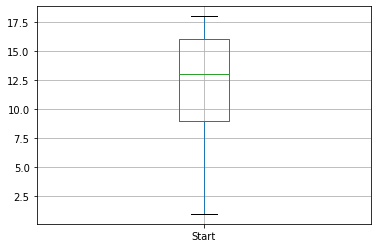

In [33]:
df.boxplot(column=['Start'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21418ac390>,
      dtype=object)

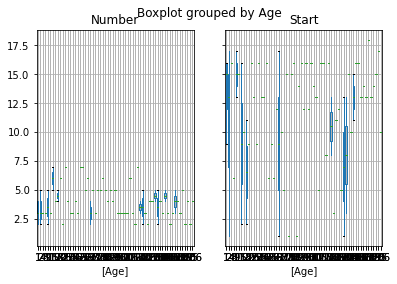

In [34]:
df.boxplot(by="Age")

b.	Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.

categorical columns: 
Numerical columns: 
Binary columns: 
Multi valued columns: 